# <center>Emotional Speech Recognition

In [65]:
import os

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# librosa is a Python library for analyzing audio and music.
# It can be used to extract the data from the audio files we will see it later
import librosa 
import librosa.display

# to play the audio files
from IPython.display import Audio,display

** Since the feature extraction require a huge amount of time, before we start, in the codelines below, specify if there are already dataframes available and if so the path of those ones.  

In [66]:
DATA_FRAMES = True
fem_path = './input/features/Female_features.csv'
mal_path = './input/features/Male_features.csv'

In [67]:
TESS = "./input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
RAV = "./input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
SAVEE = "./input/surrey-audiovisual-expressed-emotion-savee/ALL/"
CREMA = "./input/cremad/AudioWAV/"

In [68]:
# Get the data location for SAVEE
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('angry')
    elif i[-8:-6]=='_d':
        emotion.append('disgust')
    elif i[-8:-6]=='_f':
        emotion.append('fear')
    elif i[-8:-6]=='_h':
        emotion.append('happy')
    elif i[-8:-6]=='_n':
        emotion.append('neutral')
    elif i[-8:-6]=='sa':
        emotion.append('sad')
    elif i[-8:-6]=='su':
        emotion.append('surprise')
    else:
        emotion.append('unknown') 
    path.append(SAVEE + i)

# Now check out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
print('SAVEE dataset')
SAVEE_df.head()

SAVEE dataset


labels                                               path
0  angry  ./input/surrey-audiovisual-expressed-emotion-s...
1  angry  ./input/surrey-audiovisual-expressed-emotion-s...
2  angry  ./input/surrey-audiovisual-expressed-emotion-s...
3  angry  ./input/surrey-audiovisual-expressed-emotion-s...
4  angry  ./input/surrey-audiovisual-expressed-emotion-s...

In [69]:
# Get the data location for TESS
path = []
emotion = []
dir_list = os.listdir(TESS)

for i in dir_list:
    fname = os.listdir(TESS + i)   
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
#TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
print('TESS dataset')
TESS_df.head()

TESS dataset


labels                                               path
0  angry  ./input/toronto-emotional-speech-set-tess/tess...
1  angry  ./input/toronto-emotional-speech-set-tess/tess...
2  angry  ./input/toronto-emotional-speech-set-tess/tess...
3  angry  ./input/toronto-emotional-speech-set-tess/tess...
4  angry  ./input/toronto-emotional-speech-set-tess/tess...

In [70]:
# Importing datas from RAVDESS
dir = os.listdir(RAV)

males = []
females = [] 
        
for actor in dir:
       
    files = os.listdir(RAV + actor)
        
    for file in files: 
        part = file.split('.')[0]
        part = part.split("-")           
            
        temp = int(part[6])        
                
        if part[2] == '01':
            emotion = 'neutral'
        elif part[2] == '02':
            emotion = 'calm'
        elif part[2] == '03':
            emotion = 'happy'
        elif part[2] == '04':
            emotion = 'sad'
        elif part[2] == '05':
            emotion = 'angry'
        elif part[2] == '06':
            emotion = 'fear'
        elif part[2] == '07':
            emotion = 'disgust'
        elif part[2] == '08':
            emotion = 'surprise'
        else:
            emotion = 'unknown'
            
        if temp%2 == 0:
            path = (RAV + actor + '/' + file)
            #emotion = 'female_'+emotion
            females.append([emotion, path]) 
        else:
            path = (RAV + actor + '/' + file)
             #emotion = 'male_'+emotion
            males.append([emotion, path])   
    
   
RavFemales_df = pd.DataFrame(females)
RavFemales_df.columns = ['labels', 'path']

RavMales_df = pd.DataFrame(males)
RavMales_df.columns = ['labels', 'path']

print('RAVDESS datasets')
RavFemales_df.head()

RAVDESS datasets


labels                                               path
0  neutral  ./input/ravdess-emotional-speech-audio/audio_s...
1  neutral  ./input/ravdess-emotional-speech-audio/audio_s...
2  neutral  ./input/ravdess-emotional-speech-audio/audio_s...
3  neutral  ./input/ravdess-emotional-speech-audio/audio_s...
4     calm  ./input/ravdess-emotional-speech-audio/audio_s...

In [71]:
RavMales_df.head()

labels                                               path
0  neutral  ./input/ravdess-emotional-speech-audio/audio_s...
1  neutral  ./input/ravdess-emotional-speech-audio/audio_s...
2  neutral  ./input/ravdess-emotional-speech-audio/audio_s...
3  neutral  ./input/ravdess-emotional-speech-audio/audio_s...
4     calm  ./input/ravdess-emotional-speech-audio/audio_s...

In [72]:
files = os.listdir(CREMA)

female  = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]
males   = []
females = []

for file in files: 
    part = file.split('_')   
    
    if part[2] == 'SAD':
        emotion = 'sad'
    elif part[2] == 'ANG':
        emotion = 'angry'
    elif part[2] == 'DIS':
        emotion = 'disgust'
    elif part[2] == 'FEA':
        emotion = 'fear'
    elif part[2] == 'HAP':
        emotion = 'happy'
    elif part[2] == 'NEU':
        emotion = 'neutral'  
    else:
        emotion = 'unknown'
        
    if int(part[0]) in female:
        path = (CREMA + '/' + file)
        #emotion = 'female_'+emotion
        females.append([emotion, path]) 
    else:
        path = (CREMA + '/' + file)
        #emotion = 'male_'+emotion
        males.append([emotion, path])   
    
CremaFemales_df = pd.DataFrame(females)
CremaFemales_df.columns = ['labels', 'path']

CremaMales_df = pd.DataFrame(males)
CremaMales_df.columns = ['labels', 'path']
    
print('CREMA datasets')
CremaFemales_df.head()

CREMA datasets


labels                                          path
0    angry  ./input/cremad/AudioWAV//1002_DFA_ANG_XX.wav
1  disgust  ./input/cremad/AudioWAV//1002_DFA_DIS_XX.wav
2     fear  ./input/cremad/AudioWAV//1002_DFA_FEA_XX.wav
3    happy  ./input/cremad/AudioWAV//1002_DFA_HAP_XX.wav
4  neutral  ./input/cremad/AudioWAV//1002_DFA_NEU_XX.wav

In [73]:
CremaMales_df.head()

labels                                          path
0    angry  ./input/cremad/AudioWAV//1001_DFA_ANG_XX.wav
1  disgust  ./input/cremad/AudioWAV//1001_DFA_DIS_XX.wav
2     fear  ./input/cremad/AudioWAV//1001_DFA_FEA_XX.wav
3    happy  ./input/cremad/AudioWAV//1001_DFA_HAP_XX.wav
4  neutral  ./input/cremad/AudioWAV//1001_DFA_NEU_XX.wav

In [74]:
# Now lets merge all the dataframe
Males = pd.concat([SAVEE_df, RavMales_df, CremaMales_df], axis = 0)
Males.to_csv("males_emotions_df.csv", index = False)

Females = pd.concat([TESS_df, RavFemales_df, CremaFemales_df], axis = 0)
Females.to_csv("females_emotions_df.csv", index = False)

# <center> Data Visualization

First, we will plot the number of emotions (of wich above there are the proportions).
Then using Librosa there will be some waveplots related to each emotion

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


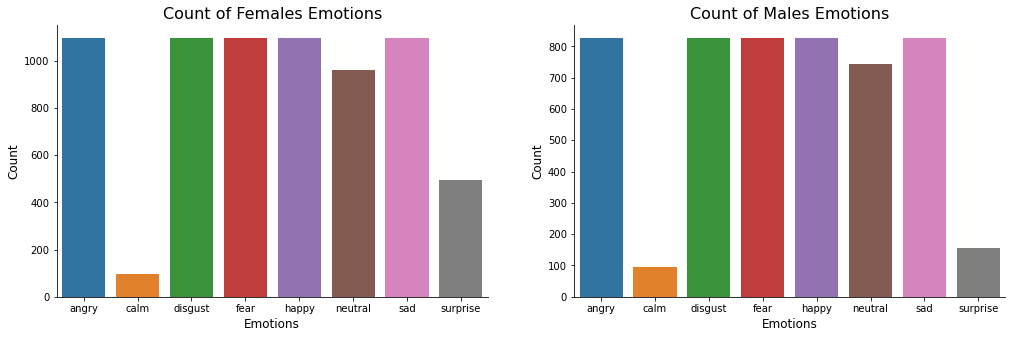

In [75]:
order = ['angry','calm','disgust','fear','happy','neutral','sad','surprise']

fig = plt.figure(figsize=(17, 5))

fig.add_subplot(121)
plt.title('Count of Females Emotions', size=16)
sns.countplot(Females.labels, order = order)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)

fig.add_subplot(122)
plt.title('Count of Males Emotions', size=16)
sns.countplot(Males.labels, order = order)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)

plt.show()

In [76]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {e} emotion', size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

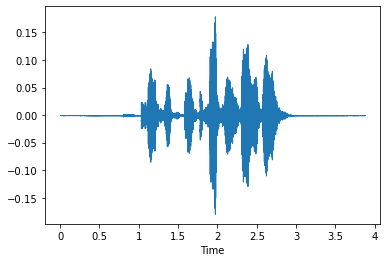

In [77]:
emotion='Angry'
path = './input/ravdess-emotional-speech-audio/Actor_01/03-01-05-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
Audio(path)

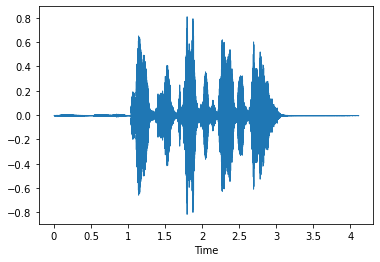

In [78]:
emotion='Very Angry' 
path = './input/ravdess-emotional-speech-audio/Actor_01/03-01-05-02-01-01-01.wav'
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
Audio(path)

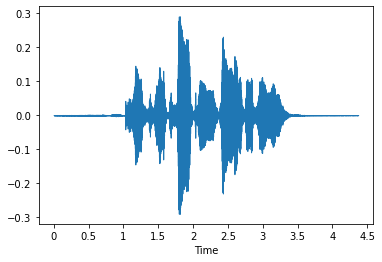

In [79]:
emotion='Sing Angry'
path = './input/ravdess-emotional-song-audio/Actor_01/03-02-05-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
Audio(path)

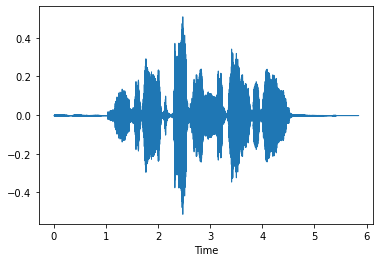

In [80]:
emotion='Sing Very Angry' 
path = './input/ravdess-emotional-song-audio/Actor_01/03-02-05-02-01-01-01.wav'
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
Audio(path)

## Adding augmentation

#### Definition:
* Data augmentation is the process by which we create new synthetic training samples by adding small perturbations on our initial training set.
* The objective is to make our model invariant to those perturbations and enhace its ability to generalize.
* In order to this to work adding the perturbations must conserve the same label as the original training sample.
* In images data augmention can be performed by shifting the image, zooming, rotating ...
* In our case we will add noise, stretch and roll, pitch shift ...

In [81]:
def noise(data):
    noise_amp = 0.04*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.70):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.8):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

def higher_speed(data, speed_factor = 1.25):
    return librosa.effects.time_stretch(data, speed_factor)

def lower_speed(data, speed_factor = 0.75):
    return librosa.effects.time_stretch(data, speed_factor)

# taking any example and checking for techniques.
path = path = './input/ravdess-emotional-speech-audio/Actor_01/03-01-05-01-01-01-01.wav'
data, sample_rate = librosa.load(path)

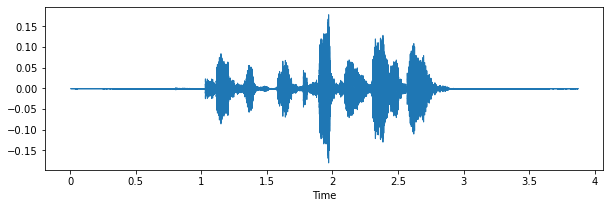

In [82]:
plt.figure(figsize=(10,3))
x = noise(data)
librosa.display.waveshow(data, sr=sampling_rate)
Audio(x, rate=sample_rate)

C:\Users\dhiva\AppData\Local\TEMP_~1/ipykernel_4868/3377251064.py:7: FutureWarning: Pass rate=0.7 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, rate)


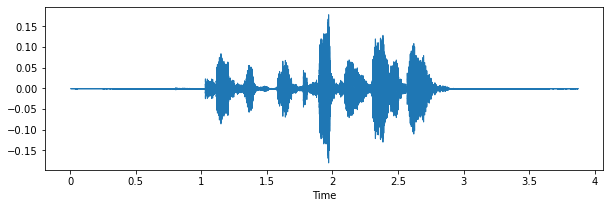

In [83]:
plt.figure(figsize=(10,3))
x = stretch(data)
librosa.display.waveshow(data, sr=sampling_rate)
Audio(x, rate=sample_rate)

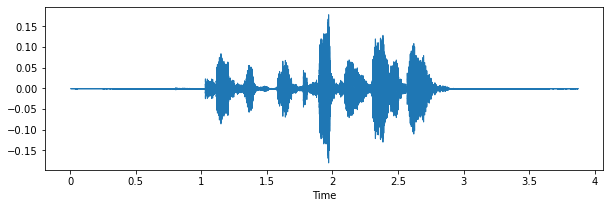

In [84]:
plt.figure(figsize=(10,3))
x = shift(data)
librosa.display.waveshow(data, sr=sampling_rate)
Audio(x, rate=sample_rate)

C:\Users\dhiva\AppData\Local\TEMP_~1/ipykernel_4868/3377251064.py:14: FutureWarning: Pass sr=22050, n_steps=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)


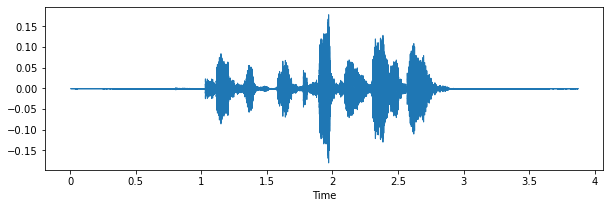

In [85]:
plt.figure(figsize=(10,3))
x = pitch(data, sample_rate)
librosa.display.waveshow(data, sr=sampling_rate)
Audio(x, rate=sample_rate)

C:\Users\dhiva\AppData\Local\TEMP_~1/ipykernel_4868/3377251064.py:17: FutureWarning: Pass rate=1.25 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, speed_factor)


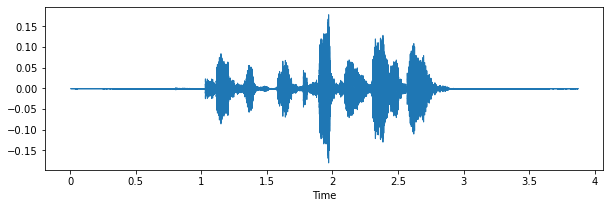

In [86]:
plt.figure(figsize=(10,3))
x = higher_speed(data)
librosa.display.waveshow(data, sr=sampling_rate)
Audio(x, rate=sample_rate)

C:\Users\dhiva\AppData\Local\TEMP_~1/ipykernel_4868/3377251064.py:20: FutureWarning: Pass rate=0.75 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, speed_factor)


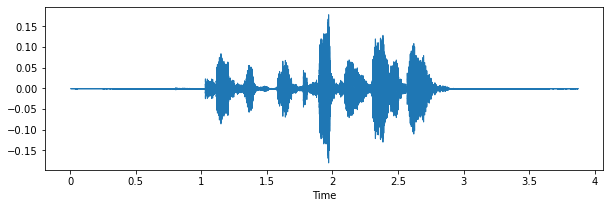

In [87]:
plt.figure(figsize=(10,3))
x = lower_speed(data)
librosa.display.waveshow(data, sr=sampling_rate)
Audio(x, rate=sample_rate)

# <center> Feature Extraction</center>

As we understand, the data provided from audio cannot be understood by the models directly, so we need to convert them into an understandable format for which feature extraction is used.
The audio signal is a three-dimensional signal in which three axes represent time, amplitude and frequency.


Looking at the waveplots above seems clear (from an eye test) that the waveform itself may not necessarily yield clear class identifying information. Infact they look quite similar.<br/>  
It turns out one of the best tool to feature extract from audio waveforms ( and digital signal in general) is   **Mel Frequency Cepstral Coefficents (MFCCs)**.  Below we will go through a brief technical discussion, just to see how MFCCs works

## add to references 
* All the infos about feature extraction and audio processing were taken from https://medium.com/comet-ml/applyingmachinelearningtoaudioanalysis-utm-source-kdnuggets11-19-e160b069e88
* Mel Frequency Cepstral Coefficients (MFCCs), introduced by Davis and Mermelstein in 1980.

## Mel-Frequency Cepstral Coefficients (MFCCs)
This feature is one of the most important method to extract a feature of an audio signal and is used majorly whenever working on audio signals. The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope.

In [88]:
#sample_rate = 22050

def extract_features(data):
    
    result = np.array([])
    mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=58)
    mfccs_processed = np.mean(mfccs.T,axis=0)
    result = np.array(mfccs_processed)
     
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=3, offset=0.5, res_type='kaiser_fast') 
    
    #without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    #noised
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    #stretched
    stretch_data = stretch(data)
    res3 = extract_features(stretch_data)
    result = np.vstack((result, res3))
    
    #shifted
    shift_data = shift(data)
    res4 = extract_features(shift_data)
    result = np.vstack((result, res4))
    
    #pitched
    pitch_data = pitch(data, sample_rate)
    res5 = extract_features(pitch_data)
    result = np.vstack((result, res5)) 
    
    #speed up
    higher_speed_data = higher_speed(data)
    res6 = extract_features(higher_speed_data)
    result = np.vstack((result, res6))
    
    #speed down
    lower_speed_data = higher_speed(data)
    res7 = extract_features(lower_speed_data)
    result = np.vstack((result, res7))
    
    return result

In [89]:
if not DATA_FRAMES:
    
    female_X, female_Y = [], []
    for path, emotion in zip(Females.path, Females.labels):
        features = get_features(path)
        #adding augmentation, get_features return a multi dimensional array (for each augmentation), so we have to use a loop to fill the df
        for elem in features: 
            female_X.append(elem)        
            female_Y.append(emotion)
    

    male_X, male_Y = [], []
    for path, emotion in zip(Males.path, Males.labels):
        features = get_features(path)
        for elem in features:
            male_X.append(elem)
            male_Y.append(emotion)
            
    print(f'Check shapes:\nFemale features: {len(female_X)}, labels: {len(female_Y)}\nMale features:   {len(male_X)}, labels: {len(male_Y)}')

In [90]:
def setup_dataframe(gender, features, labels):
    df = pd.DataFrame(features)
    df['labels'] = labels
    df.to_csv(f'{gender}_features.csv', index=False)
    
    print(f'{gender} dataframe')
    df.sample(frac=1).head()
    
    return df

In [91]:
if not DATA_FRAMES:
    Females_Features = setup_dataframe('Female', female_X, female_Y)
else:
    Females_Features = pd.read_csv(fem_path)

In [92]:
if not DATA_FRAMES:
    Males_Features = setup_dataframe('Male', male_X, male_Y)
else:
    Males_Features = pd.read_csv(mal_path)

# <center>Data Preparation
As of now we have extracted the data, now we need to normalize and split our data for training and testing.

In [93]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [94]:
female_X = Females_Features.iloc[: ,:-1].values
female_Y = Females_Features['labels'].values

male_X = Males_Features.iloc[: ,:-1].values
male_Y = Males_Features['labels'].values

In [95]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()

female_Y = encoder.fit_transform(np.array(female_Y).reshape(-1,1)).toarray()
male_Y = encoder.fit_transform(np.array(male_Y).reshape(-1,1)).toarray()

In [96]:
import joblib
joblib.dump(encoder, 'encoder.joblib')

['encoder.joblib']

## Splitting data

Just for adding more proves that gender separation have sense

In [97]:
nogender_X = np.concatenate((female_X, male_X))
nogender_Y = np.concatenate((female_Y, male_Y))

x_train, x_test, y_train, y_test = train_test_split(nogender_X, nogender_Y, random_state=0, test_size=0.20, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((68107, 58), (68107, 8), (17027, 58), (17027, 8))

In [98]:
x_trainF, x_testF, y_trainF, y_testF = train_test_split(female_X, female_Y, random_state=0, test_size=0.20, shuffle=True)
x_trainF.shape, y_trainF.shape, x_testF.shape, y_testF.shape

((39379, 58), (39379, 8), (9845, 58), (9845, 8))

In [99]:
x_trainM, x_testM, y_trainM, y_testM = train_test_split(male_X, male_Y, random_state=0, test_size=0.20, shuffle=True)
x_trainM.shape, y_trainM.shape, x_testM.shape, y_testM.shape

((28728, 58), (28728, 8), (7182, 58), (7182, 8))

* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html  
We are going to scale our features throught the StandarScaler module, it standardize the features in a **Normal curve**, i.e.:<br><br>
  <center> $Z = (X -{\mu})/{\sigma}$. </center><br>
*Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).*

In [100]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_trainF = scaler.fit_transform(x_trainF)
x_testF = scaler.transform(x_testF)

x_trainM = scaler.fit_transform(x_trainM)
x_testM = scaler.transform(x_testM)

In [101]:
joblib.dump(scaler, 'std_scaler.bin', compress=True)

['std_scaler.bin']

## Making our data compatible to model

In [36]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape , x_test.shape , y_test.shape

((68107, 58, 1), (68107, 8), (17027, 58, 1), (17027, 8))

In [37]:
x_trainF = np.expand_dims(x_trainF, axis=2)
x_testF = np.expand_dims(x_testF, axis=2)
x_trainF.shape, y_trainF.shape, x_testF.shape, y_testF.shape

((39379, 58, 1), (39379, 8), (9845, 58, 1), (9845, 8))

In [38]:
x_trainM = np.expand_dims(x_trainM, axis=2)
x_testM = np.expand_dims(x_testM, axis=2)
x_trainM.shape, y_trainM.shape, x_testM.shape, y_testM.shape

((28728, 58, 1), (28728, 8), (7182, 58, 1), (7182, 8))

# <center>Modeling<center>

In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, AveragePooling1D
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

In [40]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [41]:
# Create a MirroredStrategy.
strategy = tf.distribute.MirroredStrategy()
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Number of devices: 1


In [42]:
with strategy.scope():
    
    def build_model(in_shape):
        
        model=Sequential()
        model.add(Conv1D(256, kernel_size=6, strides=1, padding='same', activation='relu', input_shape=(in_shape, 1)))
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))

        model.add(Conv1D(128, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))

        model.add(Conv1D(128, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))
        model.add(Dropout(0.2))

        model.add(Conv1D(64, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(MaxPooling1D(pool_size=4, strides = 2, padding = 'same'))
        
        model.add(Flatten())
        model.add(Dense(units=32, activation='relu'))
        model.add(Dropout(0.3))

        model.add(Dense(units=8, activation='softmax'))
        model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
          
        
        return model

In [43]:
def model_build_summary(mod_dim, tr_features, val_features, val_labels):
    model = build_model(mod_dim)
    model.summary()
    
    score = model.evaluate(val_features, val_labels, verbose = 1)
    accuracy = 100*score[1]
    
    return model

*ReduceLROnPlateau* reduce learning rate when a metric has stopped improving.<br>

Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.

In [44]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=4, min_lr=0.000001)

batch_size = 32
n_epochs = 100

In [45]:
def show_graphs(history):
    epochs = [i for i in range(n_epochs)]
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    test_acc = history.history['val_accuracy']
    test_loss = history.history['val_loss']

    fig.set_size_inches(30,12)
    ax[0].plot(epochs , train_loss , label = 'Training Loss')
    ax[0].plot(epochs , test_loss , label = 'Testing Loss')
    ax[0].set_title('Training & Testing Loss')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")

    ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
    ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
    ax[1].set_title('Training & Testing Accuracy')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    plt.show()

## Model Summary and Pre-training Accuracy

In [46]:
total_model = model_build_summary(x_train.shape[1], x_train, x_test, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 58, 256)           1792      
                                                                 
 average_pooling1d (AverageP  (None, 29, 256)          0         
 ooling1D)                                                       
                                                                 
 conv1d_1 (Conv1D)           (None, 29, 128)           196736    
                                                                 
 average_pooling1d_1 (Averag  (None, 15, 128)          0         
 ePooling1D)                                                     
                                                                 
 conv1d_2 (Conv1D)           (None, 15, 128)           98432     
                                                                 
 average_pooling1d_2 (Averag  (None, 8, 128)           0

In [47]:
female_model = model_build_summary(x_trainF.shape[1], x_trainF, x_testF, y_testF)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 58, 256)           1792      
                                                                 
 average_pooling1d_3 (Averag  (None, 29, 256)          0         
 ePooling1D)                                                     
                                                                 
 conv1d_5 (Conv1D)           (None, 29, 128)           196736    
                                                                 
 average_pooling1d_4 (Averag  (None, 15, 128)          0         
 ePooling1D)                                                     
                                                                 
 conv1d_6 (Conv1D)           (None, 15, 128)           98432     
                                                                 
 average_pooling1d_5 (Averag  (None, 8, 128)          

In [48]:
male_model = model_build_summary(x_trainM.shape[1], x_trainM, x_testM, y_testM)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 58, 256)           1792      
                                                                 
 average_pooling1d_6 (Averag  (None, 29, 256)          0         
 ePooling1D)                                                     
                                                                 
 conv1d_9 (Conv1D)           (None, 29, 128)           196736    
                                                                 
 average_pooling1d_7 (Averag  (None, 15, 128)          0         
 ePooling1D)                                                     
                                                                 
 conv1d_10 (Conv1D)          (None, 15, 128)           98432     
                                                                 
 average_pooling1d_8 (Averag  (None, 8, 128)          

## Model training

In [49]:
history = total_model.fit(x_train, y_train, batch_size=batch_size, epochs=n_epochs, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/100
2129/2129 [==============================] - 83s 38ms/step - loss: 1.4159 - accuracy: 0.4308 - val_loss: 1.2032 - val_accuracy: 0.5171 - lr: 0.0010
Epoch 2/100
2129/2129 [==============================] - 84s 39ms/step - loss: 1.1920 - accuracy: 0.5251 - val_loss: 1.0913 - val_accuracy: 0.5600 - lr: 0.0010
Epoch 3/100
2129/2129 [==============================] - 82s 39ms/step - loss: 1.1129 - accuracy: 0.5593 - val_loss: 1.0527 - val_accuracy: 0.5897 - lr: 0.0010
Epoch 4/100
2129/2129 [==============================] - 94s 44ms/step - loss: 1.0543 - accuracy: 0.5847 - val_loss: 0.9831 - val_accuracy: 0.6024 - lr: 0.0010
Epoch 5/100
2129/2129 [==============================] - 116s 54ms/step - loss: 1.0097 - accuracy: 0.6023 - val_loss: 0.9454 - val_accuracy: 0.6238 - lr: 0.0010
Epoch 6/100
2129/2129 [==============================] - 85s 40ms/step - loss: 0.9687 - accuracy: 0.6207 - val_loss: 0.8985 - val_accuracy: 0.6433 - lr: 0.0010
Epoch 7/100
2129/2129 [================

Epoch 52/100
2129/2129 [==============================] - 83s 39ms/step - loss: 0.3189 - accuracy: 0.8863 - val_loss: 0.4421 - val_accuracy: 0.8561 - lr: 0.0010
Epoch 53/100
2129/2129 [==============================] - 82s 39ms/step - loss: 0.3171 - accuracy: 0.8882 - val_loss: 0.4455 - val_accuracy: 0.8582 - lr: 0.0010
Epoch 54/100
2129/2129 [==============================] - 83s 39ms/step - loss: 0.3130 - accuracy: 0.8904 - val_loss: 0.4376 - val_accuracy: 0.8612 - lr: 0.0010
Epoch 55/100
2129/2129 [==============================] - 82s 39ms/step - loss: 0.3125 - accuracy: 0.8911 - val_loss: 0.4232 - val_accuracy: 0.8621 - lr: 0.0010
Epoch 56/100
2129/2129 [==============================] - 83s 39ms/step - loss: 0.3068 - accuracy: 0.8928 - val_loss: 0.4242 - val_accuracy: 0.8653 - lr: 0.0010
Epoch 57/100
2129/2129 [==============================] - 83s 39ms/step - loss: 0.3015 - accuracy: 0.8944 - val_loss: 0.4239 - val_accuracy: 0.8663 - lr: 0.0010
Epoch 58/100
2129/2129 [==========

In [50]:
female_history = female_model.fit(x_trainF, y_trainF, batch_size=batch_size, epochs=n_epochs, validation_data=(x_testF, y_testF), callbacks=[rlrp])

Epoch 1/100
1231/1231 [==============================] - 49s 39ms/step - loss: 1.2848 - accuracy: 0.4911 - val_loss: 0.9487 - val_accuracy: 0.6289 - lr: 0.0010
Epoch 2/100
1231/1231 [==============================] - 48s 39ms/step - loss: 0.9973 - accuracy: 0.6058 - val_loss: 0.8514 - val_accuracy: 0.6564 - lr: 0.0010
Epoch 3/100
1231/1231 [==============================] - 48s 39ms/step - loss: 0.9132 - accuracy: 0.6333 - val_loss: 0.8055 - val_accuracy: 0.6798 - lr: 0.0010
Epoch 4/100
1231/1231 [==============================] - 48s 39ms/step - loss: 0.8366 - accuracy: 0.6665 - val_loss: 0.7798 - val_accuracy: 0.6890 - lr: 0.0010
Epoch 5/100
1231/1231 [==============================] - 48s 39ms/step - loss: 0.7866 - accuracy: 0.6839 - val_loss: 0.7095 - val_accuracy: 0.7185 - lr: 0.0010
Epoch 6/100
1231/1231 [==============================] - 48s 39ms/step - loss: 0.7452 - accuracy: 0.7032 - val_loss: 0.6647 - val_accuracy: 0.7390 - lr: 0.0010
Epoch 7/100
1231/1231 [=================

Epoch 52/100
1231/1231 [==============================] - 45s 37ms/step - loss: 0.1438 - accuracy: 0.9511 - val_loss: 0.2652 - val_accuracy: 0.9278 - lr: 0.0010
Epoch 53/100
1231/1231 [==============================] - 44s 36ms/step - loss: 0.1423 - accuracy: 0.9517 - val_loss: 0.2597 - val_accuracy: 0.9256 - lr: 0.0010
Epoch 54/100
1231/1231 [==============================] - 55s 44ms/step - loss: 0.1367 - accuracy: 0.9526 - val_loss: 0.2645 - val_accuracy: 0.9298 - lr: 0.0010
Epoch 55/100
1231/1231 [==============================] - 53s 43ms/step - loss: 0.1413 - accuracy: 0.9516 - val_loss: 0.2815 - val_accuracy: 0.9270 - lr: 0.0010
Epoch 56/100
1231/1231 [==============================] - 51s 41ms/step - loss: 0.1348 - accuracy: 0.9537 - val_loss: 0.2555 - val_accuracy: 0.9304 - lr: 0.0010
Epoch 57/100
1231/1231 [==============================] - 48s 39ms/step - loss: 0.1349 - accuracy: 0.9539 - val_loss: 0.2905 - val_accuracy: 0.9199 - lr: 0.0010
Epoch 58/100
1231/1231 [==========

In [51]:
male_history = male_model.fit(x_trainM, y_trainM, batch_size=batch_size, epochs=n_epochs, validation_data=(x_testM, y_testM), callbacks=[rlrp])

Epoch 1/100
898/898 [==============================] - 37s 40ms/step - loss: 1.7053 - accuracy: 0.3088 - val_loss: 1.4940 - val_accuracy: 0.4117 - lr: 0.0010
Epoch 2/100
898/898 [==============================] - 35s 39ms/step - loss: 1.5041 - accuracy: 0.4002 - val_loss: 1.3781 - val_accuracy: 0.4616 - lr: 0.0010
Epoch 3/100
898/898 [==============================] - 35s 39ms/step - loss: 1.4213 - accuracy: 0.4390 - val_loss: 1.3239 - val_accuracy: 0.4815 - lr: 0.0010
Epoch 4/100
898/898 [==============================] - 35s 39ms/step - loss: 1.3509 - accuracy: 0.4707 - val_loss: 1.2252 - val_accuracy: 0.5223 - lr: 0.0010
Epoch 5/100
898/898 [==============================] - 35s 39ms/step - loss: 1.2857 - accuracy: 0.5002 - val_loss: 1.1884 - val_accuracy: 0.5380 - lr: 0.0010
Epoch 6/100
898/898 [==============================] - 35s 40ms/step - loss: 1.2237 - accuracy: 0.5241 - val_loss: 1.1118 - val_accuracy: 0.5647 - lr: 0.0010
Epoch 7/100
898/898 [==============================]

**Uncomment the code below to see the output of a specific layer

In [52]:
from keras import backend as K

layer_name = 'conv1d_7'
intermediate_layer_model = keras.Model(inputs=female_model.input,
                                       outputs=female_model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model(x_testF)
print(intermediate_output[1,0])

tf.Tensor(
[0.         0.         0.         0.         0.         0.
 0.01677564 0.         0.         0.         0.         0.
 0.         0.         0.         0.         2.565543   0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.24892935 2.1588097
 0.         0.         0.         0.         0.50890535 0.04271311
 0.         0.         0.         0.         0.         0.
 0.         2.08744    0.         0.         1.7323456  0.
 5.518097   0.         0.         0.         0.         0.
 0.         0.         0.         0.        ], shape=(64,), dtype=float32)


## Performance Evaluations

In [53]:
# genderless
score = total_model.evaluate(x_train,y_train, verbose = 0)
print("Mixed-gender emotions training Accuracy: {0:.2%}".format(score[1]))

score = total_model.evaluate(x_test, y_test, verbose=0)
print("Mixed-gender emotions testing Accuracy: {0:.2%}".format(score[1]))

Mixed-gender emotions training Accuracy: 97.87%
Mixed-gender emotions testing Accuracy: 88.06%


In [54]:
score = female_model.evaluate(x_trainF,y_trainF, verbose = 0)
print("Female emotions training Accuracy: {0:.2%}".format(score[1]))

score = female_model.evaluate(x_testF, y_testF, verbose=0)
print("Female emotions testing Accuracy: {0:.2%}".format(score[1]))

Female emotions training Accuracy: 99.98%
Female emotions testing Accuracy: 94.51%


In [55]:
score = male_model.evaluate(x_trainM,y_trainM, verbose = 0)
print("Male emotions training Accuracy: {0:.2%}".format(score[1]))

score = male_model.evaluate(x_testM, y_testM, verbose=0)
print("Male emotions testing Accuracy: {0:.2%}".format(score[1]))

Male emotions training Accuracy: 99.79%
Male emotions testing Accuracy: 89.06%


## Training and Validation trends

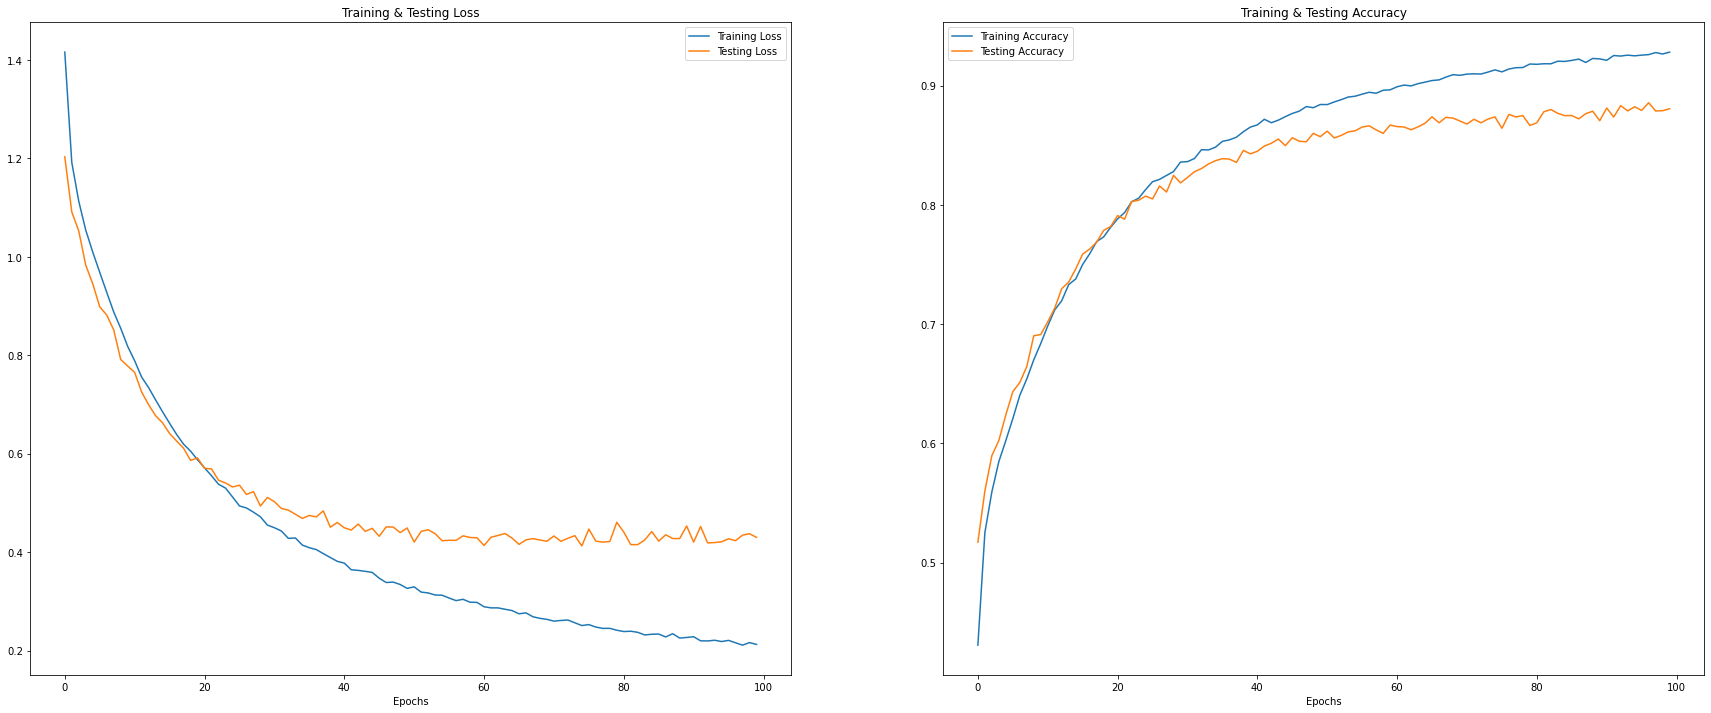

In [56]:
show_graphs(history)

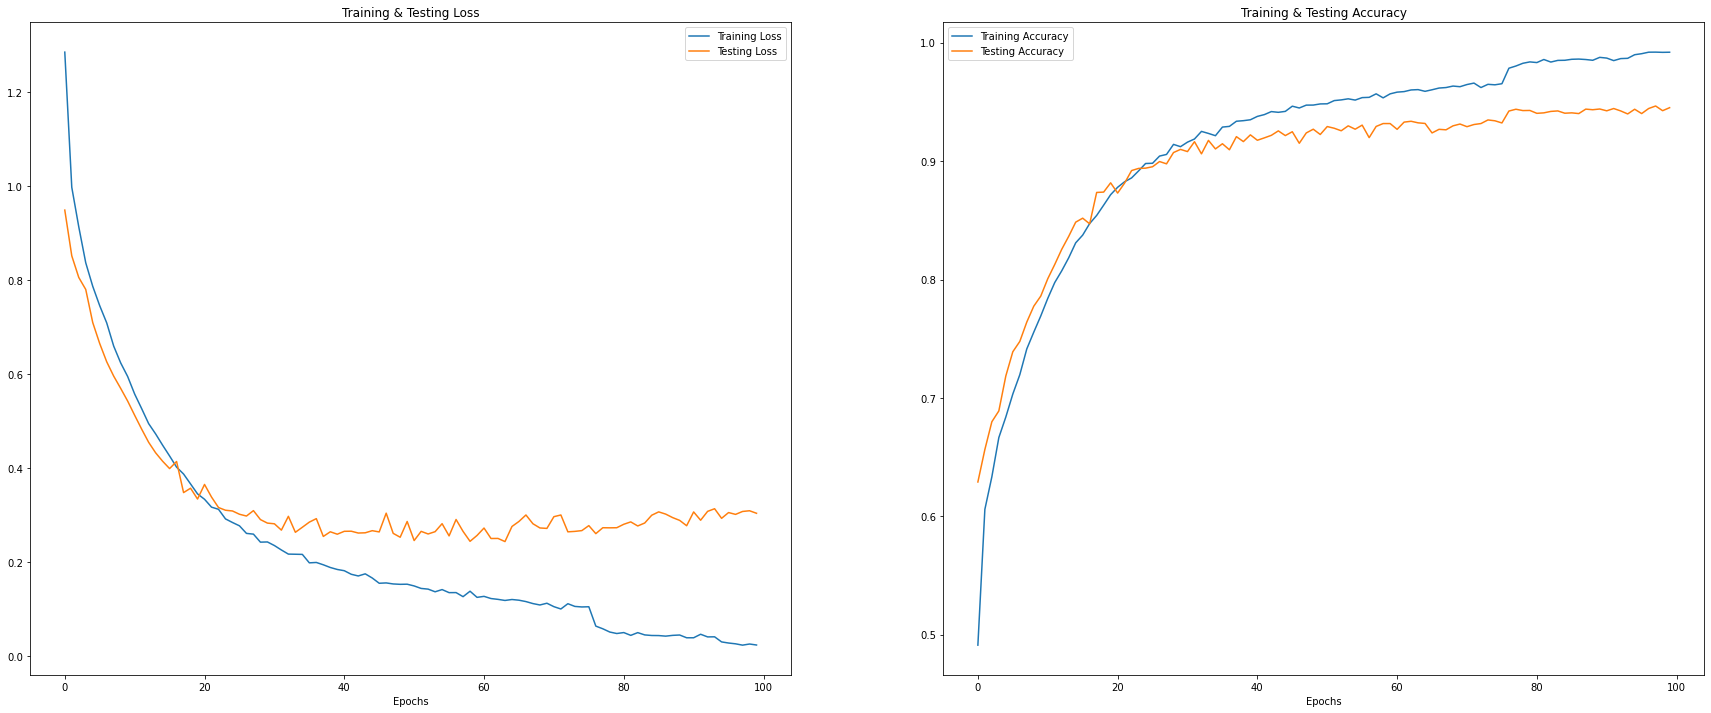

In [57]:
show_graphs(female_history)

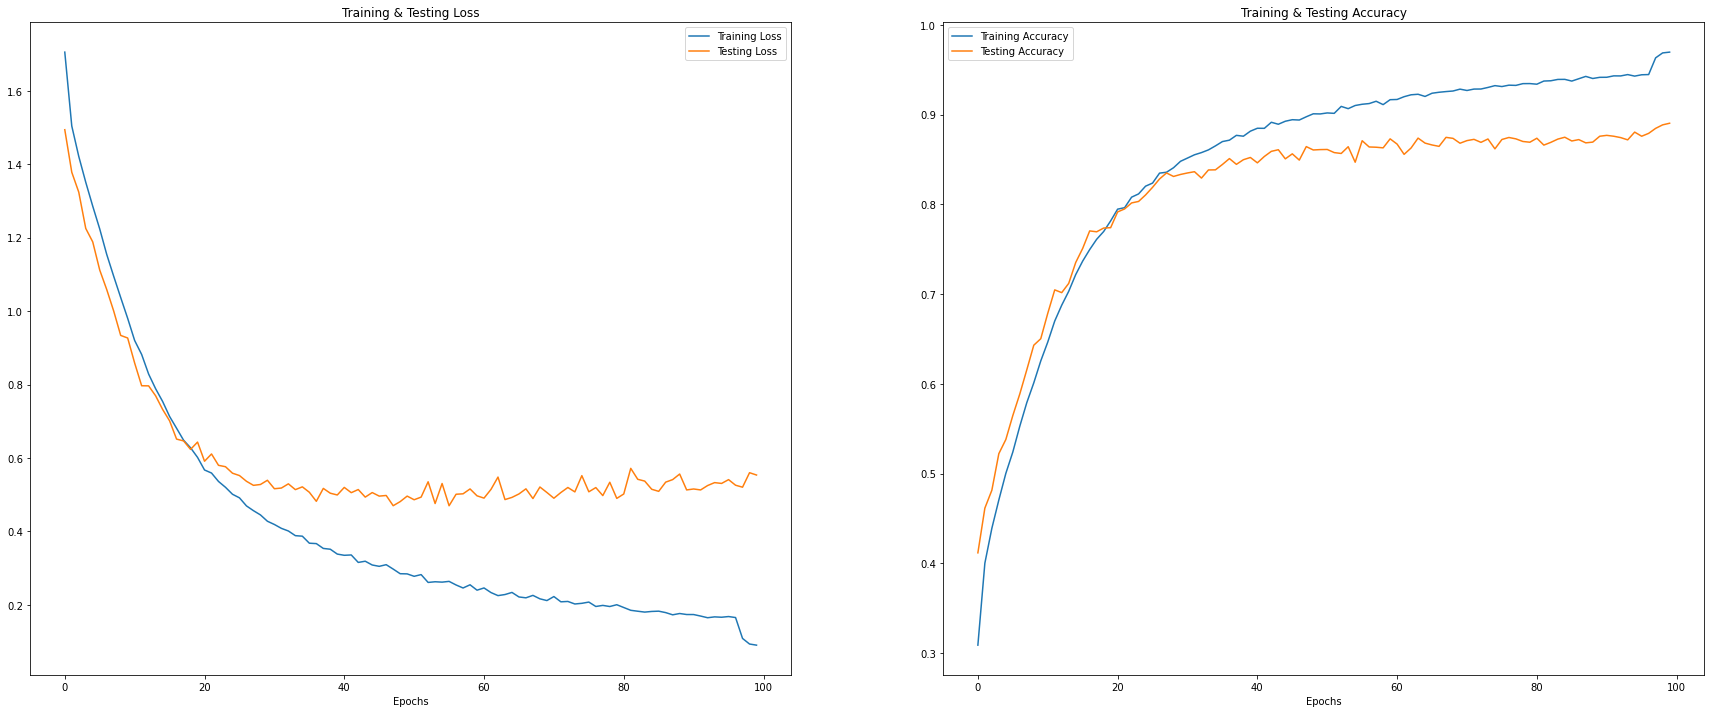

In [58]:
show_graphs(male_history)

## Confusion matrix

In [59]:
# predicting on test data.
pred_test = female_model.predict(x_testF)
y_pred = encoder.inverse_transform(pred_test)
y_test_ = encoder.inverse_transform(y_testF)

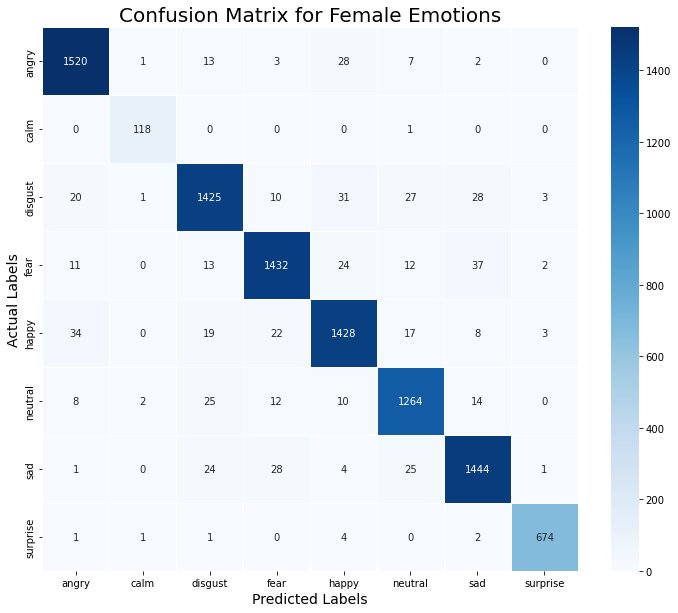

In [60]:
cm = confusion_matrix(y_test_, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix for Female Emotions', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [61]:
# predicting on test data.
pred_test = male_model.predict(x_testM)
y_pred = encoder.inverse_transform(pred_test)
y_test_ = encoder.inverse_transform(y_testM)

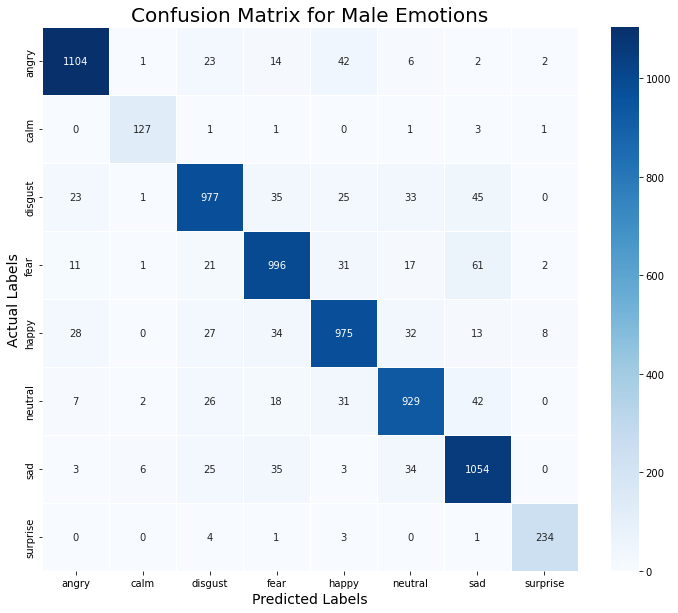

In [62]:
cm = confusion_matrix(y_test_, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix for Male Emotions', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [65]:
def predictAudio(path):
    features=np.expand_dims(scaler.fit_transform(get_features(path)), axis=2)
    pred_test = encoder.inverse_transform(male_model.predict(features))
    ans=[i[0] for i in pred_test]
    print (ans)
    display(Audio(path))
    return max(ans,key=ans.count)

In [66]:
predictAudio(TESS_df['path'][0]),TESS_df['path'][0]

['disgust', 'angry', 'happy', 'happy', 'angry', 'angry', 'angry']


C:\Users\dhiva\AppData\Local\TEMP_~1/ipykernel_19568/3377251064.py:7: FutureWarning: Pass rate=0.7 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, rate)
C:\Users\dhiva\AppData\Local\TEMP_~1/ipykernel_19568/3377251064.py:14: FutureWarning: Pass sr=22050, n_steps=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)
C:\Users\dhiva\AppData\Local\TEMP_~1/ipykernel_19568/3377251064.py:17: FutureWarning: Pass rate=1.25 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, speed_factor)


('angry',
 './input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav')

In [67]:
predictAudio("D:/BraveDownloads/taken_clip.wav")

C:\Users\dhiva\AppData\Local\TEMP_~1/ipykernel_19568/3377251064.py:7: FutureWarning: Pass rate=0.7 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, rate)
C:\Users\dhiva\AppData\Local\TEMP_~1/ipykernel_19568/3377251064.py:14: FutureWarning: Pass sr=22050, n_steps=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)


['happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy']


C:\Users\dhiva\AppData\Local\TEMP_~1/ipykernel_19568/3377251064.py:17: FutureWarning: Pass rate=1.25 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, speed_factor)


'happy'

In [68]:
predictAudio(RavMales_df['path'][100]),RavMales_df['path'][100]

C:\Users\dhiva\AppData\Local\TEMP_~1/ipykernel_19568/3377251064.py:7: FutureWarning: Pass rate=0.7 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, rate)
C:\Users\dhiva\AppData\Local\TEMP_~1/ipykernel_19568/3377251064.py:14: FutureWarning: Pass sr=22050, n_steps=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)


['fear', 'neutral', 'happy', 'disgust', 'fear', 'happy', 'happy']


C:\Users\dhiva\AppData\Local\TEMP_~1/ipykernel_19568/3377251064.py:17: FutureWarning: Pass rate=1.25 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, speed_factor)


('happy',
 './input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_03/03-01-06-02-01-01-03.wav')

In [69]:
predictAudio(SAVEE_df['path'][3]),SAVEE_df['path'][3]

C:\Users\dhiva\AppData\Local\TEMP_~1/ipykernel_19568/3377251064.py:7: FutureWarning: Pass rate=0.7 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, rate)
C:\Users\dhiva\AppData\Local\TEMP_~1/ipykernel_19568/3377251064.py:14: FutureWarning: Pass sr=22050, n_steps=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)
C:\Users\dhiva\AppData\Local\TEMP_~1/ipykernel_19568/3377251064.py:17: FutureWarning: Pass rate=1.25 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, speed_factor)


['sad', 'angry', 'disgust', 'sad', 'disgust', 'happy', 'happy']


('sad', './input/surrey-audiovisual-expressed-emotion-savee/ALL/DC_a04.wav')

In [70]:
total_model.save("total_model.h5")

In [71]:
male_model.save("male_model.h5")

In [72]:
female_model.save("female_model.h5")